In [16]:
import datacube
dc = datacube.Datacube(app='Sentinel_2')


/home/ubuntu/miniconda3/envs/cubeenv/lib/python3.6/site-packages/datacube/drivers/postgres/_connections.py:84: SADeprecationWarning: Calling URL() directly is deprecated and will be disabled in a future release.  The public constructor for URL is now the URL.create() method.
  username=username, password=password,


In [18]:
lat, lon = 49, 30
buffer = 0.25

query = {
 'time': ('2021-06', '2021-07'),
    'x': (lon - buffer, lon + buffer),
    'y': (lat + buffer, lat - buffer),
    'output_crs': 'epsg:6933',
    'resolution':(-20,20),
}

In [19]:
ds = dc.load(product='s2_l2a', dask_chunks={},**query)
print(ds)

<xarray.Dataset>
Dimensions:      (time: 13, x: 2413, y: 2110)
Coordinates:
  * time         (time) datetime64[ns] 2021-06-01T09:06:42 ... 2021-07-31T09:...
  * y            (y) float64 5.552e+06 5.552e+06 ... 5.509e+06 5.509e+06
  * x            (x) float64 2.87e+06 2.87e+06 2.871e+06 ... 2.919e+06 2.919e+06
    spatial_ref  int32 6933
Data variables: (12/15)
    B01          (time, y, x) uint16 dask.array<chunksize=(1, 2110, 2413), meta=np.ndarray>
    B02          (time, y, x) uint16 dask.array<chunksize=(1, 2110, 2413), meta=np.ndarray>
    B03          (time, y, x) uint16 dask.array<chunksize=(1, 2110, 2413), meta=np.ndarray>
    B04          (time, y, x) uint16 dask.array<chunksize=(1, 2110, 2413), meta=np.ndarray>
    B05          (time, y, x) uint16 dask.array<chunksize=(1, 2110, 2413), meta=np.ndarray>
    B06          (time, y, x) uint16 dask.array<chunksize=(1, 2110, 2413), meta=np.ndarray>
    ...           ...
    B09          (time, y, x) uint16 dask.array<chunksize=(1, 2

In [20]:
bands = ['green', 'blue', 'red']
ds = dc.load(product='s2_l2a', measurements=bands, dask_chunks={},**query)
print(ds)

<xarray.Dataset>
Dimensions:      (time: 13, x: 2413, y: 2110)
Coordinates:
  * time         (time) datetime64[ns] 2021-06-01T09:06:42 ... 2021-07-31T09:...
  * y            (y) float64 5.552e+06 5.552e+06 ... 5.509e+06 5.509e+06
  * x            (x) float64 2.87e+06 2.87e+06 2.871e+06 ... 2.919e+06 2.919e+06
    spatial_ref  int32 6933
Data variables:
    green        (time, y, x) uint16 dask.array<chunksize=(1, 2110, 2413), meta=np.ndarray>
    blue         (time, y, x) uint16 dask.array<chunksize=(1, 2110, 2413), meta=np.ndarray>
    red          (time, y, x) uint16 dask.array<chunksize=(1, 2110, 2413), meta=np.ndarray>
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref


In [21]:
print(ds.green.time)

<xarray.DataArray 'time' (time: 13)>
array(['2021-06-01T09:06:42.000000000', '2021-06-04T09:16:39.000000000',
       '2021-06-11T09:06:42.000000000', '2021-06-14T09:16:38.000000000',
       '2021-06-21T09:06:42.000000000', '2021-06-24T09:16:39.000000000',
       '2021-07-01T09:06:43.000000000', '2021-07-04T09:16:40.000000000',
       '2021-07-11T09:06:44.000000000', '2021-07-14T09:16:41.000000000',
       '2021-07-21T09:06:45.000000000', '2021-07-24T09:16:41.000000000',
       '2021-07-31T09:06:45.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time         (time) datetime64[ns] 2021-06-01T09:06:42 ... 2021-07-31T09:...
    spatial_ref  int32 6933
Attributes:
    units:    seconds since 1970-01-01 00:00:00


In [22]:
first_timestep = ds.green.sel(time='2021-06-24')
print(first_timestep)

<xarray.DataArray 'green' (time: 1, y: 2110, x: 2413)>
dask.array<getitem, shape=(1, 2110, 2413), dtype=uint16, chunksize=(1, 2110, 2413), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 2021-06-24T09:16:39
  * y            (y) float64 5.552e+06 5.552e+06 ... 5.509e+06 5.509e+06
  * x            (x) float64 2.87e+06 2.87e+06 2.871e+06 ... 2.919e+06 2.919e+06
    spatial_ref  int32 6933
Attributes:
    units:         1
    nodata:        0
    crs:           epsg:6933
    grid_mapping:  spatial_ref


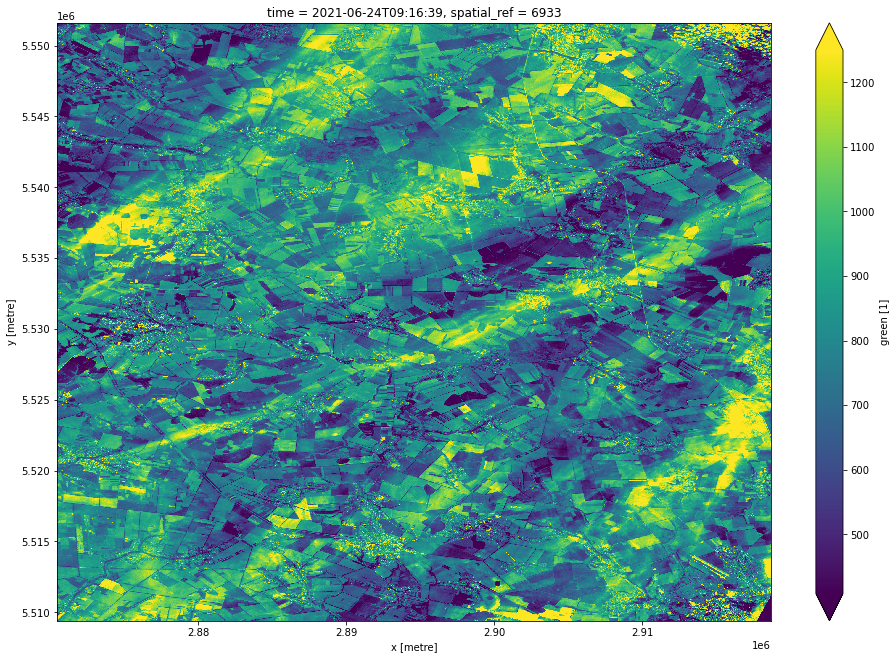

In [23]:
first_timestep.plot(figsize = (16,11), robust=True)

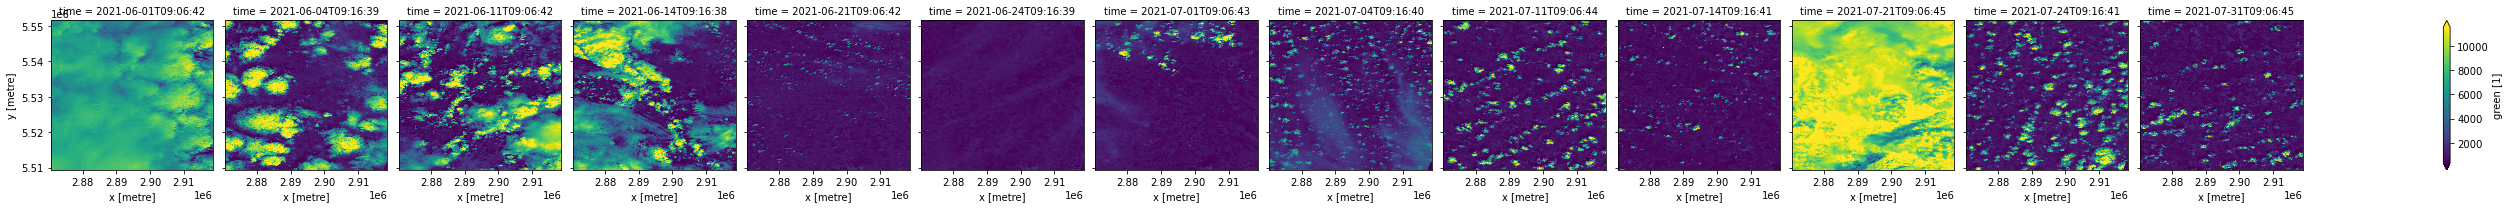

In [24]:
ds.green.plot(col="time", robust=True)